## SALES PRICE PREDICTIONS OF AMES HOUSING SUBDIVISION

In [1]:
#importing all useful packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from scipy.stats import mode 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#loading the train and test data set.
h_train = pd.read_csv('/Users/grace/DSIWEEKFIVE/PROJECT3/project-3/train.csv')
h_test = pd.read_csv('/Users/grace/DSIWEEKFIVE/PROJECT3/project-3/test.csv')

EDA BEGINS

In [3]:
#shape of the original dataset
print(h_train.shape, h_test.shape)

(1460, 81) (879, 80)


In [4]:
#Columns of the test set 
h_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
# Removing the space between the column header in the test set 
h_test.columns = [i.replace(' ', '') for i in h_test.columns ]

In [6]:
# Removing special character '/' from 'YearRemodAdd'
h_test.columns = [i.replace('/', '') for i in h_test.columns]

In [7]:
# Checking the column header for the test set.
h_test.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pav

In [8]:
# Keeping a hold of the original train and test set by creating a copy to work with.
h_train1 = h_train
h_test1 = h_test

In [9]:
print(h_train1.shape, h_test1.shape)

(1460, 81) (879, 80)


In [10]:
# Checking feature types and any null values.
h_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id               879 non-null int64
PID              879 non-null int64
MSSubClass       879 non-null int64
MSZoning         879 non-null object
LotFrontage      719 non-null float64
LotArea          879 non-null int64
Street           879 non-null object
Alley            58 non-null object
LotShape         879 non-null object
LandContour      879 non-null object
Utilities        879 non-null object
LotConfig        879 non-null object
LandSlope        879 non-null object
Neighborhood     879 non-null object
Condition1       879 non-null object
Condition2       879 non-null object
BldgType         879 non-null object
HouseStyle       879 non-null object
OverallQual      879 non-null int64
OverallCond      879 non-null int64
YearBuilt        879 non-null int64
YearRemodAdd     879 non-null int64
RoofStyle        879 non-null object
RoofMatl         879 non-null object
Exterior1st    

RUNNING IMPUTER ON THE 'LOTFRONTAGE' AND 'GARAGEYRBLT' FOR BOTH THE TRAIN AND TEST SET.

TRAIN SET FOR FEATURE 'LotFrontage'

In [11]:
# Using an Imputer to fill the empty column in the feature 'LotFrontage'
strategy = 'median'
imp = Imputer(strategy=strategy)
imp.fit(h_train1['LotFrontage'].values.reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [12]:
# Transforming the matrix of the feature 'LotFrontage'
h_train1['LotFrontage'] = imp.transform(h_train1['LotFrontage'].values.reshape(-1, 1))

In [13]:
# Verifying the edition.
h_train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

TEST SET FOR 'LotFrontage'

In [14]:
# Using an Imputer to fill the empty column in the feature 'LotFrontage'
strategy = 'median'
#imp = Imputer(strategy=strategy)
imp.fit(h_test1['LotFrontage'].values.reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [15]:
# Transforming the matrix of the feature 'LotFrontage'
h_test1['LotFrontage'] = imp.transform(h_test1['LotFrontage'].values.reshape(-1, 1))

In [16]:
#Verifying the edition.
h_test1['LotFrontage'].describe()

count    879.000000
mean      69.333333
std       21.373811
min       21.000000
25%       60.000000
50%       68.000000
75%       78.500000
max      182.000000
Name: LotFrontage, dtype: float64

TRAIN SET ON 'GarageYrBlt'

In [17]:
mode(h_train['GarageYrBlt'])

ModeResult(mode=array([ 2005.]), count=array([65]))

In [18]:
# Using an Imputer to fill the empty column in the feature 'GarageYrBlt'
strategy = 'most_frequent'
imput = Imputer(strategy=strategy)
imput.fit(h_train1['GarageYrBlt'].values.reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [19]:
# Transforming the matrix of the feature 'GarageYrBlt'
h_train1['GarageYrBlt'] = imput.transform(h_train1['GarageYrBlt'].values.reshape(-1, 1))


In [20]:
#Verifying the edition.
h_train1['GarageYrBlt'].describe()

count    1460.000000
mean     1979.976027
std        24.749688
min      1900.000000
25%      1962.000000
50%      1984.500000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

TEST SET ON 'GarageYrBlt'

In [21]:
# Using an Imputer to fill the empty column in the feature 'LotFrontage'
strategy = 'most_frequent'
imput.fit(h_test1['GarageYrBlt'].values.reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [22]:
# Transforming the matrix of the feature 'LotFrontage'
h_test1['GarageYrBlt'] = imput.transform(h_test1['GarageYrBlt'].values.reshape(-1, 1))

In [23]:
# Verifying the edition.
h_test1['GarageYrBlt'].describe()

count     879.000000
mean     1978.240046
std        25.789722
min      1900.000000
25%      1960.000000
50%      1980.000000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

TRAIN SET on 'MasVnrArea'

In [24]:
# Using an Imputer to fill the empty column in the feature 'MasVnrArea'
strategy = 'median'
input1 = Imputer(strategy=strategy)
input1.fit(h_train1['MasVnrArea'].values.reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [25]:
# Transforming the matrix of the feature 'MasVnrArea'
h_train1['MasVnrArea'] = imp.transform(h_train1['MasVnrArea'].values.reshape(-1, 1))

TEST SET on 'MasVnrArea'

In [26]:
# Using an Imputer to fill the empty column in the feature 'MasVnrArea'
strategy = 'median'
input1 = Imputer(strategy=strategy)
input1.fit(h_test1['MasVnrArea'].values.reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [27]:
# Transforming the matrix of the feature 'MasVnrArea'
h_test1['MasVnrArea'] = imp.transform(h_test1['MasVnrArea'].values.reshape(-1, 1))

USING A GET DUMMIES ON THE OBJECT FEATURES

NEIGHBORHOOD

In [28]:
h_train_N = pd.get_dummies(h_train1['Neighborhood'], prefix='Neighborhood')

In [29]:
# Joining the dummies of the neighborhood to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_N], axis=1)

In [30]:
h_test_N = pd.get_dummies(h_test1['Neighborhood'], prefix='Neighborhood')

In [31]:
# Joining the dummies of the neighborhood to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_N], axis=1)

EXTERNAL QUALITY

In [32]:
# Dummies for the ExterQual features
h_train_Ex = pd.get_dummies(h_train1['ExterQual'], prefix='External')

In [33]:
# Joining the dummies of the ExterQual to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_Ex], axis=1)

In [34]:
# Dummies for the ExterQual features
h_test_Ex = pd.get_dummies(h_test1['ExterQual'], prefix='External')

In [35]:
# Joining the dummies of the ExterQual to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_Ex], axis=1)

HEATINGQC

In [36]:
# Dummies for the HEATINGQC features
h_train_HQC = pd.get_dummies(h_train1['HeatingQC'], prefix='HQC')

In [37]:
# Joining the dummies of the HEATINGQCto the original dataframe.
h_train1 = pd.concat([h_train1, h_train_HQC], axis=1)

In [38]:
# Dummies for the HEATINGQC features
h_test_HQC = pd.get_dummies(h_test1['HeatingQC'], prefix='HQC')

In [39]:
# Joining the dummies of the HEATINGQCto the original dataframe.
h_test1 = pd.concat([h_test1, h_test_HQC], axis=1)

KITCHEN QUALITY

In [40]:
# Dummies for the KitchenQual features
h_train_Kitch = pd.get_dummies(h_train1['KitchenQual'], prefix='Kitch')

In [41]:
# Joining the dummies of the KitchenQual to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_Kitch], axis=1)

In [42]:
# Dummies for the KitchenQual features
h_test_Kitch = pd.get_dummies(h_test1['KitchenQual'], prefix='Kitch')

In [43]:
# Joining the dummies of the KitchenQual to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_Kitch], axis=1)

BUILDING TYPE

In [44]:
# Dummies for the BldgType features
h_train_BuildType = pd.get_dummies(h_train1['BldgType'], prefix='BldgType')

In [45]:
# Joining the dummies of the BldgType to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_BuildType], axis=1)

In [46]:
# Dummies for the BldgType features
h_test_BuildType = pd.get_dummies(h_test1['BldgType'], prefix='BldgType')

In [47]:
# Joining the dummies of the BldgType to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_BuildType], axis=1)

CENTRAL AIR

In [48]:
# Dummies for the BldgType features
h_train_CentralAir = pd.get_dummies(h_train1['CentralAir'], prefix='Central')

In [49]:
# Joining the dummies of the BldgType to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_CentralAir], axis=1)

In [50]:
# Dummies for the BldgType features
h_test_CentralAir = pd.get_dummies(h_test1['CentralAir'], prefix='Central')

In [51]:
# Joining the dummies of the BldgType to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_CentralAir], axis=1)

LOT SHAPE

In [52]:
# Dummies for the BldgType features
h_train_LotShape = pd.get_dummies(h_train1['LotShape'], prefix='LotShape')

In [53]:
# Joining the dummies of the BldgType to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_LotShape], axis=1)

In [54]:
# Dummies for the BldgType features
h_test_LotShape = pd.get_dummies(h_test1['LotShape'], prefix='LotShape')

In [55]:
# Joining the dummies of the BldgType to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_LotShape], axis=1)

UTILITIES

In [56]:
# Dummies for the BldgType features
h_train_Utilities = pd.get_dummies(h_train1['Utilities'], prefix='Utilities')

In [57]:
# Joining the dummies of the BldgType to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_Utilities], axis=1)

In [58]:
# Dummies for the BldgType features
h_test_Utilities = pd.get_dummies(h_test1['Utilities'], prefix='Utilities')

In [59]:
# Joining the dummies of the BldgType to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_Utilities], axis=1)

HOUSING STYLE

In [60]:
# Dummies for the BldgType features
h_train_HouseStyle = pd.get_dummies(h_train1['HouseStyle'], prefix='HouseStyle')

In [61]:
# Joining the dummies of the BldgType to the original dataframe.
h_train1 = pd.concat([h_train1, h_train_HouseStyle], axis=1)

In [62]:
# Dummies for the BldgType features
h_test_HouseStyle = pd.get_dummies(h_test1['HouseStyle'], prefix='HouseStyle')

In [63]:
# Joining the dummies of the BldgType to the original dataframe.
h_test1 = pd.concat([h_test1, h_test_HouseStyle], axis=1)

In [64]:
# Comparing the dimension of the new data frame with the original for train set
print(h_train1.shape, h_train.shape)

(1460, 140) (1460, 81)


In [65]:
# Comparing the dimension of the new data frame with the original for test set
print(h_test1.shape, h_test.shape)

(879, 140) (879, 80)


In [66]:
h_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Utilities_AllPub,Utilities_NoSeWa,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,0,0,0,0,0,0,1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1,0,0,0,1,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,1,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,1,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,1,0,0


In [67]:
# Obtaining the correlations of the dataset
h_train1_corr = h_train.corr()

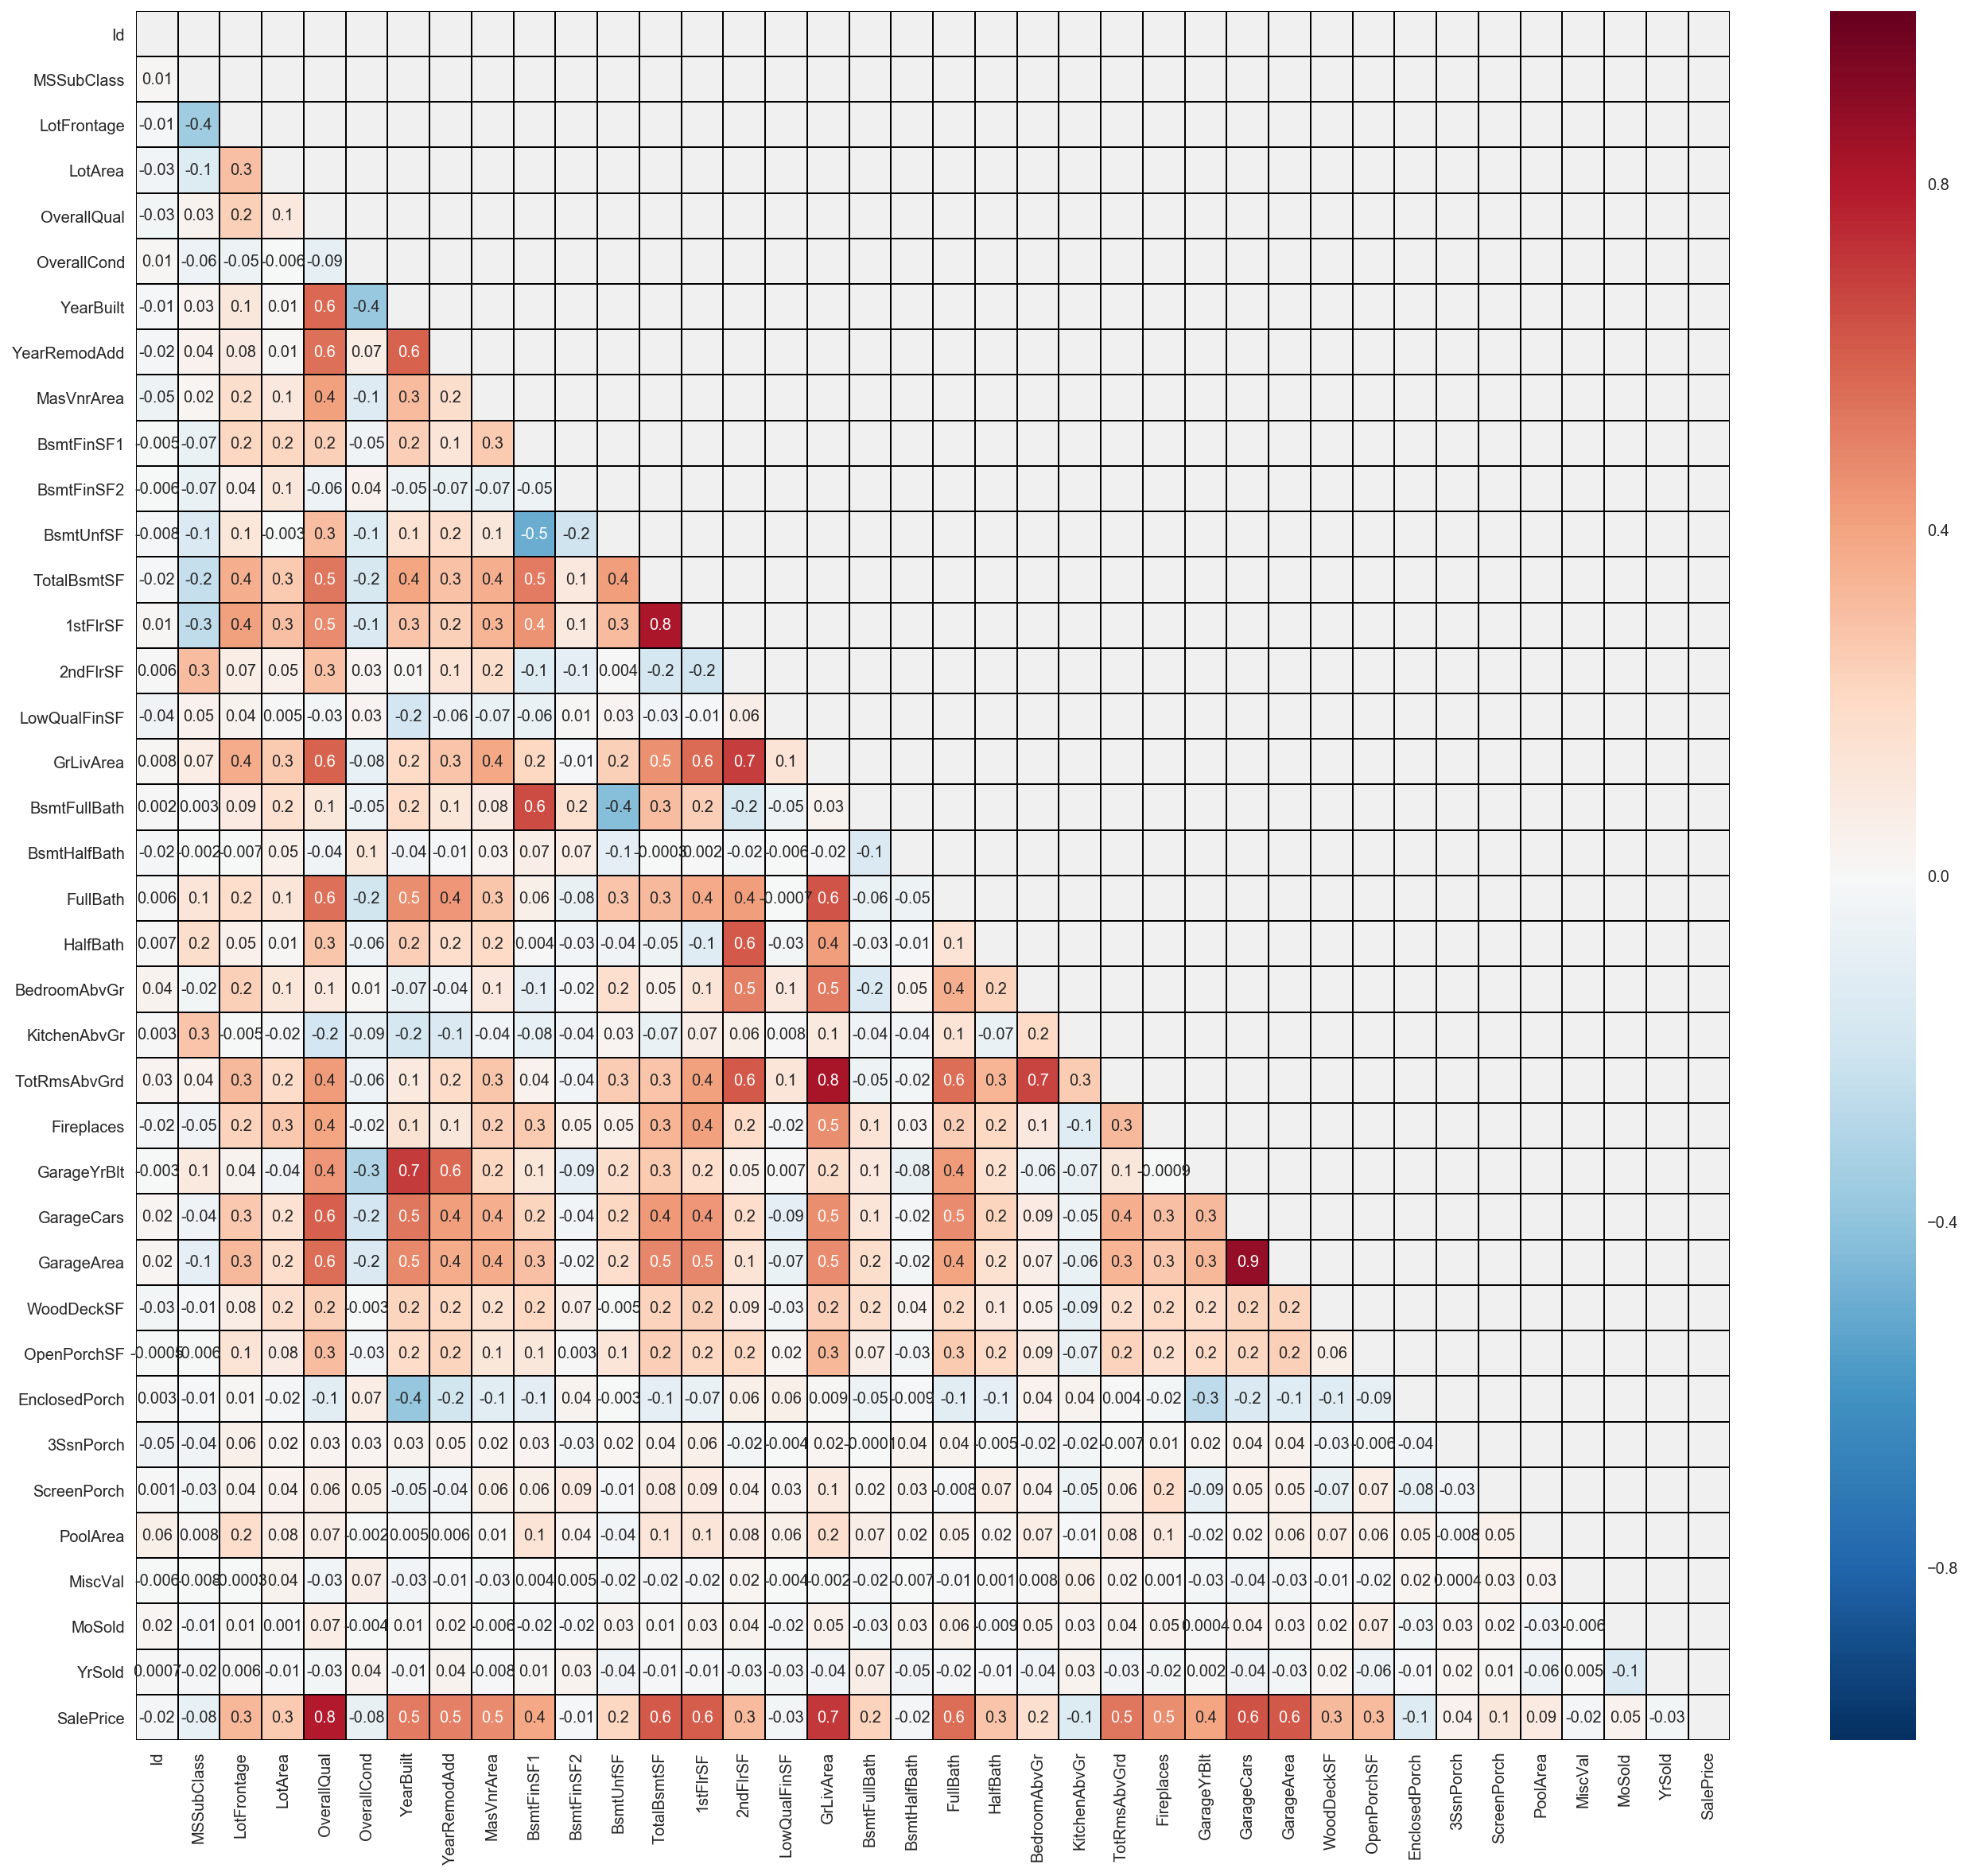

In [68]:
# Heatmap to show the correlation between the feature variables with respect to the target.
mask = np.zeros_like(h_train1_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(h_train1_corr, annot=True, linewidths = 0.5, robust = False, linecolor = 'black', fmt = '.1g', ax=ax, mask=mask)


In [69]:
# Obtaining the correlations of the dataset
h_train2_corr = h_train1.iloc[: ,71:141].corr()

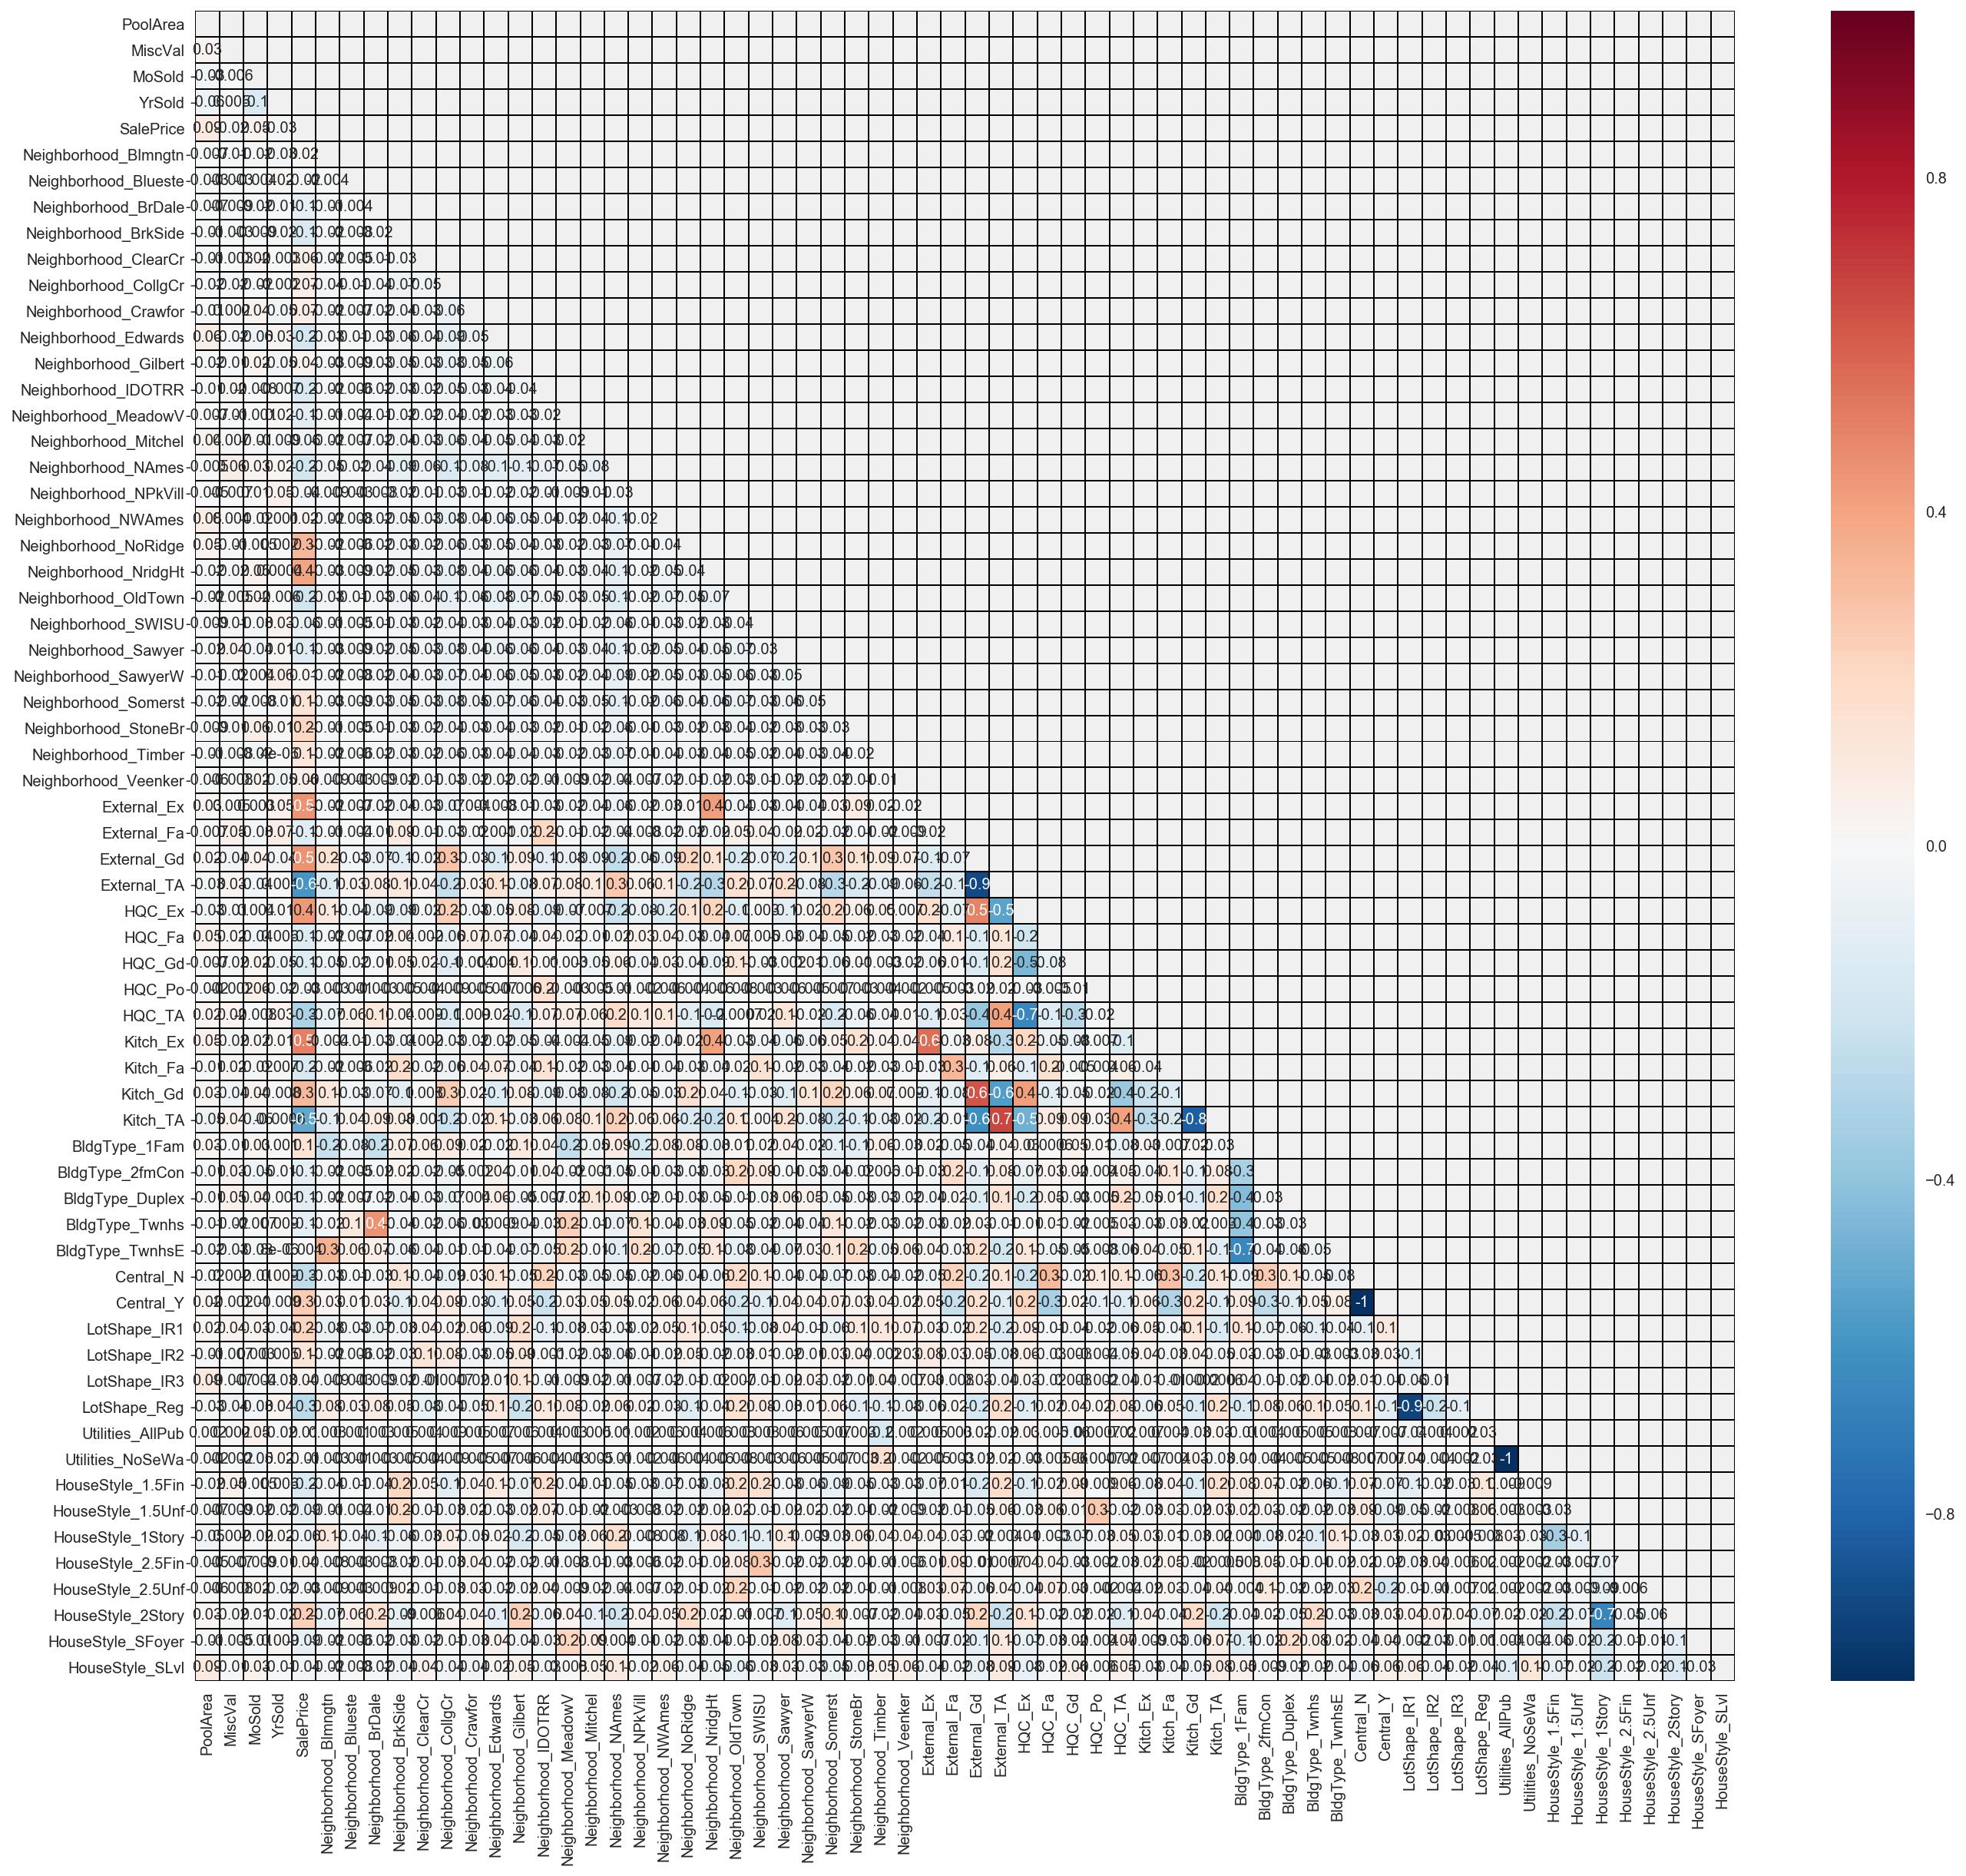

In [70]:
# Heatmap to show the correlation between the feature variables with respect to the target from column 71-140.
mask = np.zeros_like(h_train2_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(h_train2_corr, annot=True, linewidths = 0.5, robust = False, linecolor = 'black', fmt = '.1g', ax=ax, mask=mask)


In [71]:
# X = h_train1[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 
#               'Kitch_Ex', 'External_Gd', 'External_Ex', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotRmsAbvGrd',
#               'Fireplaces', 'HQC_Ex', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Central_Y']].values

Based on the heatmap above, I chose features with a correlation value greater than or equal to 0.6 with respect to the Sales Price. I also included a dummy from Kitchen Quality with a correlation of 0.5 with respect to Sale Price. 

This Features are ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'Kitch_Ex', 'External_Gd', 'External_Ex', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotRmsAbvGrd', 'Fireplaces'].

Closer look at the individual feature listed above with the target variable (Sales Price)

In [72]:
# Sales Price and OverallQual
h_train1['SalePrice'].corr(h_train1['OverallQual'])

0.79098160058380484

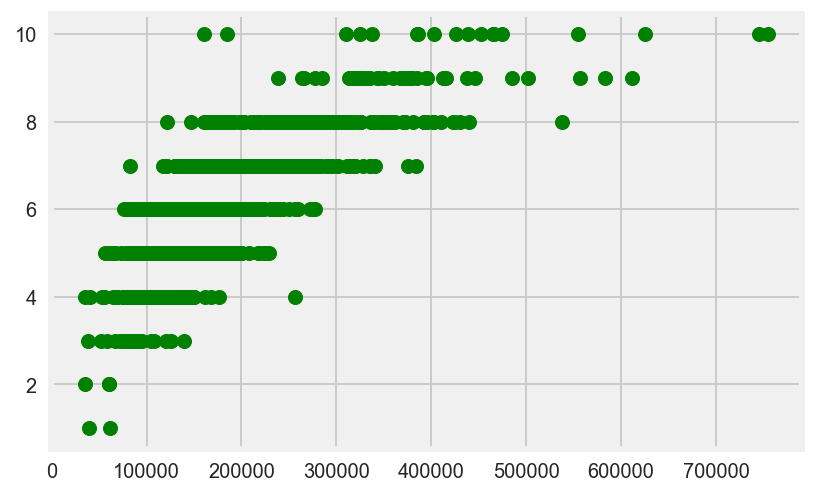

In [73]:
plt.scatter(h_train1['SalePrice'], h_train1['OverallQual'], c = 'g')

In [74]:
# Sales Price and TotalBsmtSF
h_train1['SalePrice'].corr(h_train1['TotalBsmtSF'])

0.61358055155919555

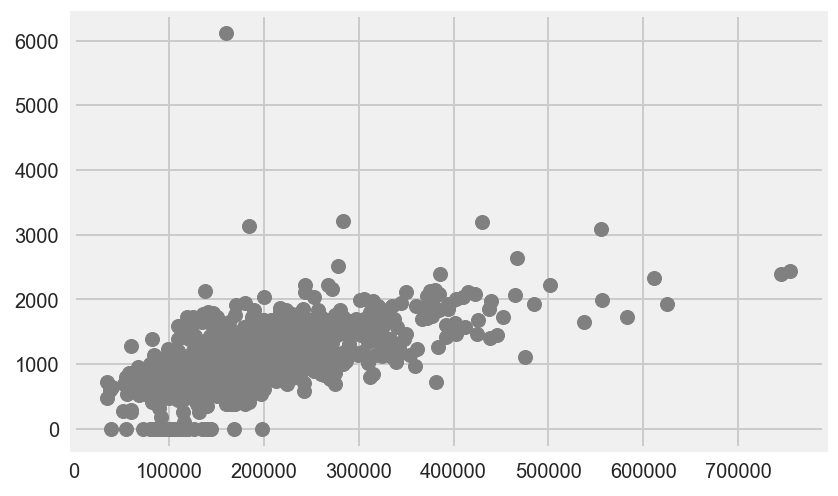

In [75]:
plt.scatter(h_train1['SalePrice'], h_train1['TotalBsmtSF'], c = 'grey')

In [76]:
# Sales Price and 1stFlrSF
h_train1['SalePrice'].corr(h_train1['1stFlrSF'])

0.60585218469191471

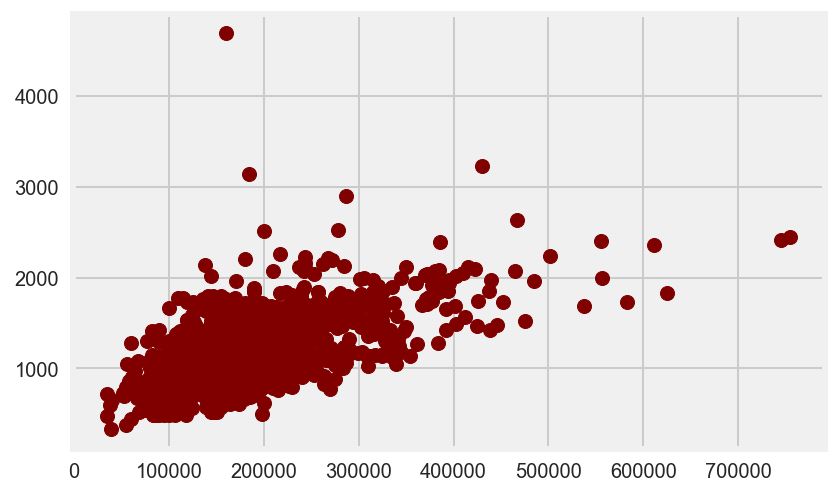

In [77]:
plt.scatter(h_train1['SalePrice'], h_train1['1stFlrSF'], c = 'maroon')

In [78]:
# Sales Price and GrLivArea
h_train1['SalePrice'].corr(h_train1['GrLivArea'])

0.70862447761265224

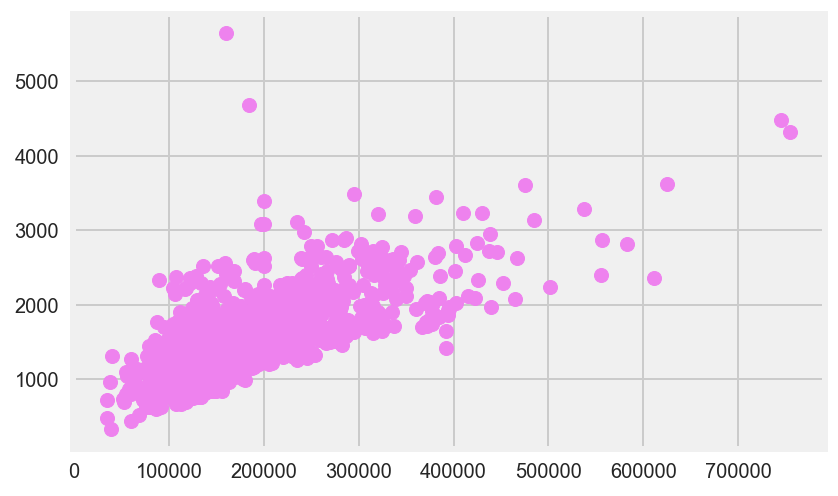

In [79]:
plt.scatter(h_train1['SalePrice'], h_train1['GrLivArea'], c = 'violet')

In [80]:
# Sales Price and GarageCars
h_train1['SalePrice'].corr(h_train1['GarageCars'])

0.6404091972583531

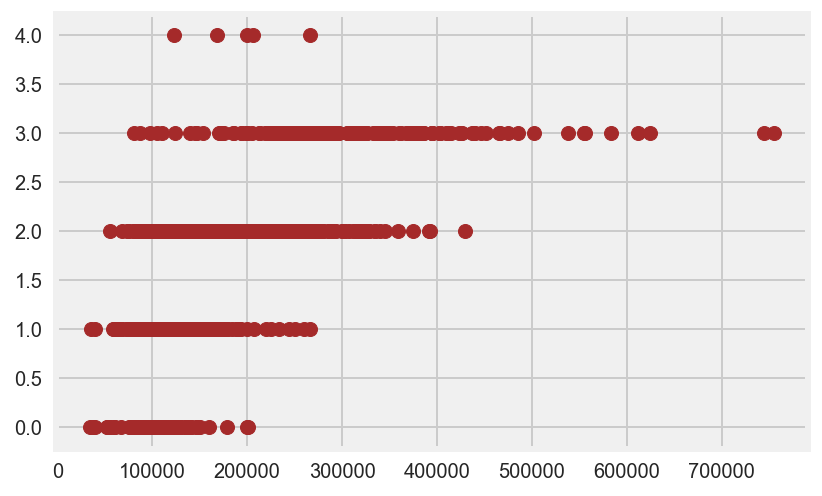

In [81]:
plt.scatter(h_train1['SalePrice'], h_train1['GarageCars'], c = 'brown')

In [82]:
# Sales Price and GrLivArea
h_train1['SalePrice'].corr(h_train1['GrLivArea'])

0.70862447761265224

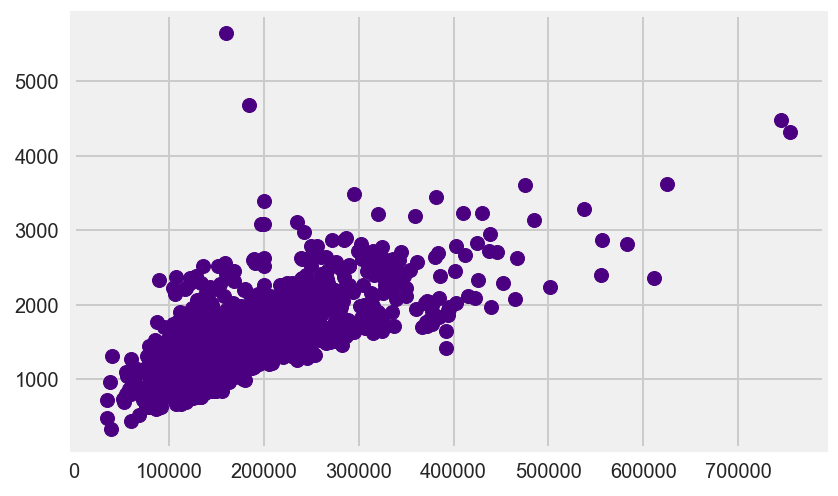

In [83]:
plt.scatter(h_train1['SalePrice'], h_train1['GrLivArea'], c = 'indigo')

In [84]:
# Sales Price and GarageArea
h_train1['SalePrice'].corr(h_train1['GarageArea'])

0.62343143891836172

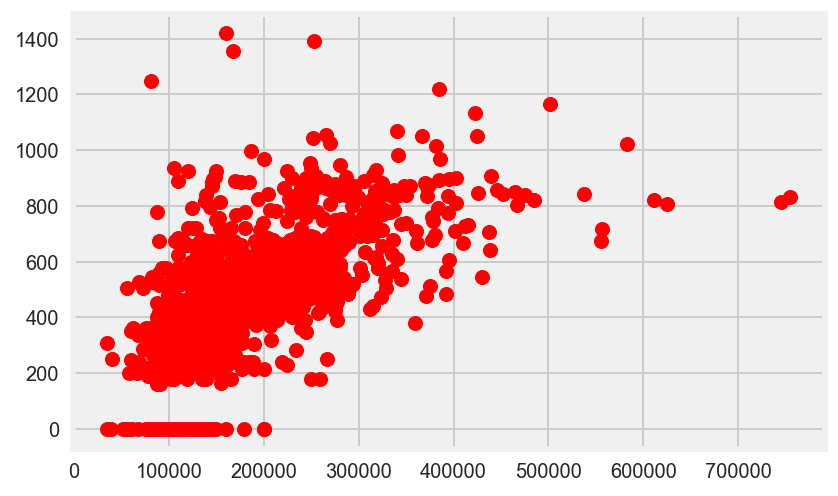

In [85]:
plt.scatter(h_train1['SalePrice'], h_train1['GarageArea'], c = 'red')

In [86]:
# Sales Price and Kitch_Ex
h_train1['SalePrice'].corr(h_train1['Kitch_Ex'])

0.50409367590529608

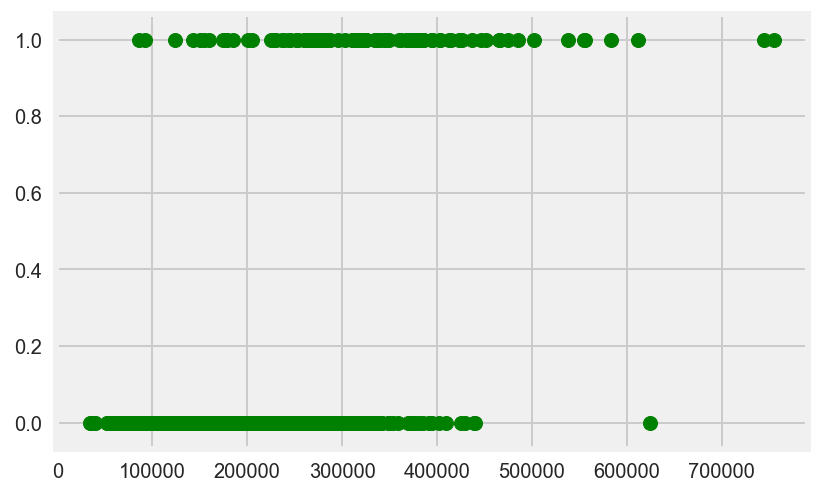

In [87]:
plt.scatter(h_train1['SalePrice'], h_train1['Kitch_Ex'], c = 'g')

In [88]:
# Sales Price and External_Gd
h_train1['SalePrice'].corr(h_train1['External_Gd'])

0.45246612784479301

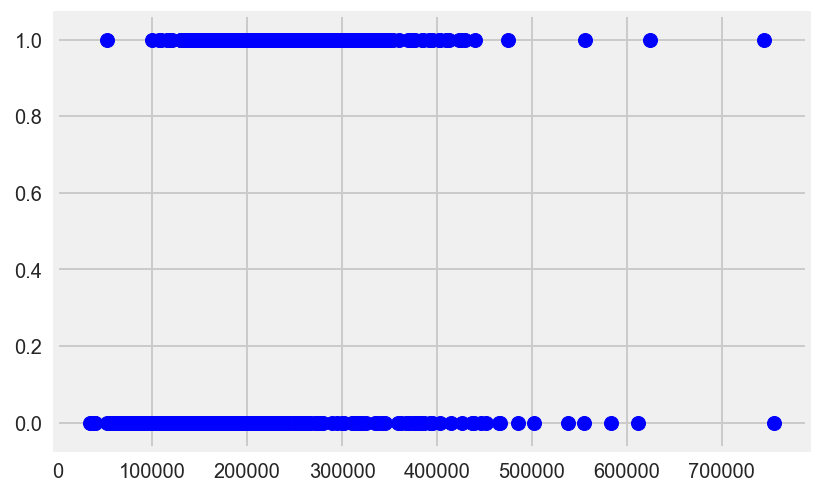

In [89]:
plt.scatter(h_train1['SalePrice'], h_train1['External_Gd'], c = 'b')

In [90]:
# Sales Price and External_Ex
h_train1['SalePrice'].corr(h_train1['External_Ex'])

0.45116433022275587

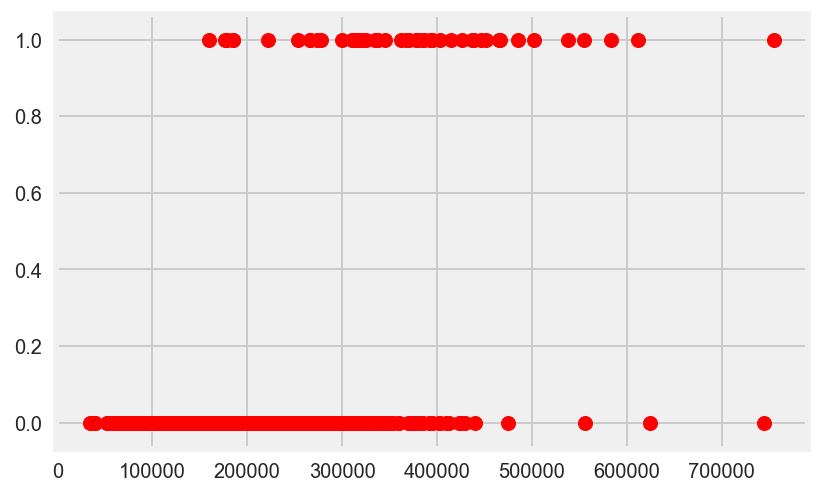

In [91]:
plt.scatter(h_train1['SalePrice'], h_train1['External_Ex'], c = 'r')

In [92]:
# Sales Price and YearBuilt
h_train1['SalePrice'].corr(h_train1['YearBuilt'])

0.52289733287949691

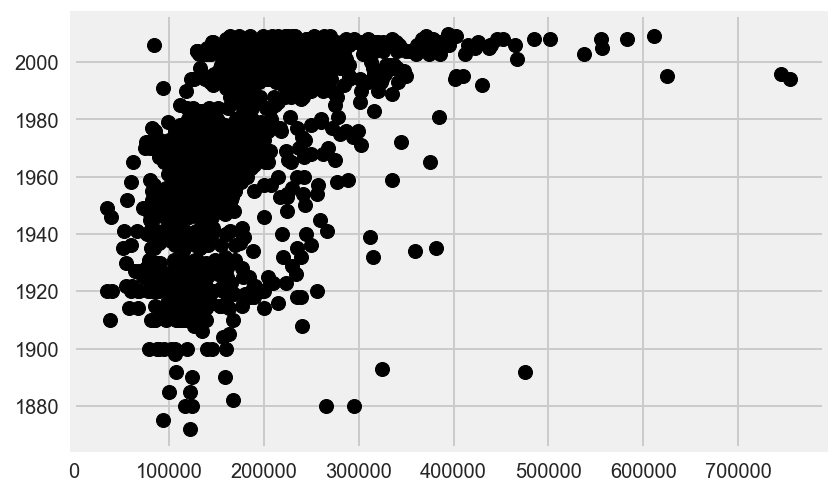

In [93]:
plt.scatter(h_train1['SalePrice'], h_train1['YearBuilt'], c = 'black')

In [94]:
# Sales Price and YearRemodAdd
h_train1['SalePrice'].corr(h_train1['YearRemodAdd'])

0.50710096711138641

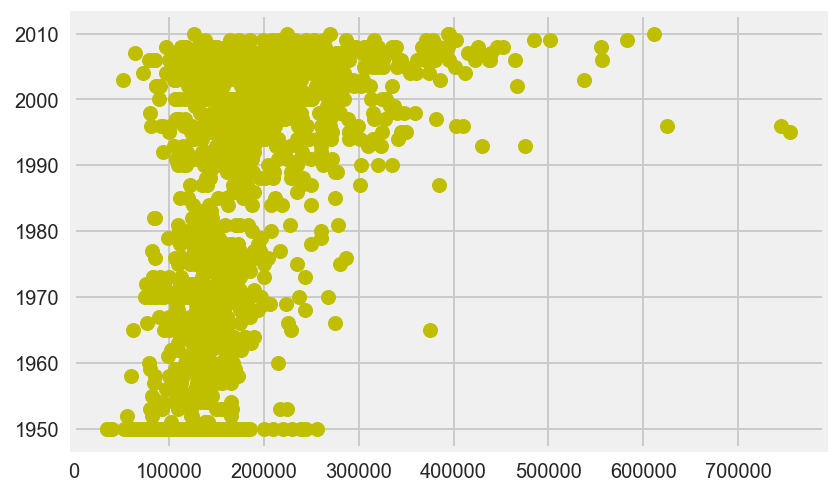

In [95]:
plt.scatter(h_train1['SalePrice'], h_train1['YearRemodAdd'], c = 'y')

In [96]:
# Sales Price and MasVnrArea
h_train1['SalePrice'].corr(h_train1['MasVnrArea'])

0.4744328946024341

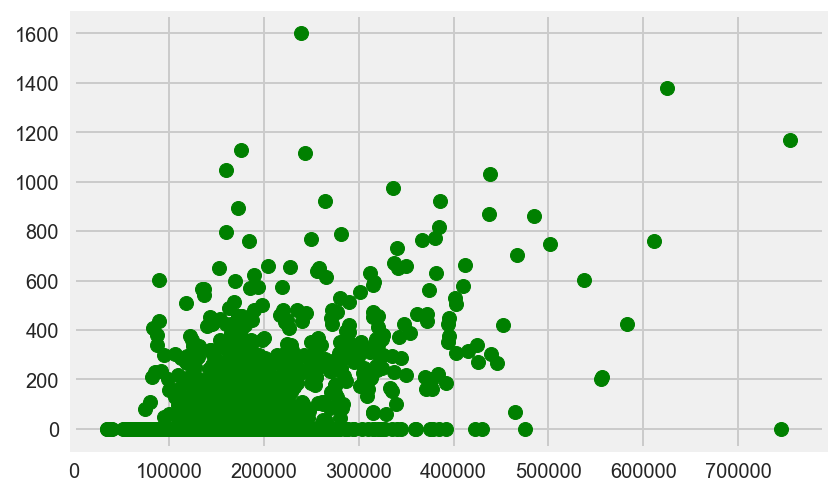

In [97]:
plt.scatter(h_train1['SalePrice'], h_train1['MasVnrArea'], c = 'g')

In [98]:
# Sales Price and TotRmsAbvGrd
h_train1['SalePrice'].corr(h_train1['TotRmsAbvGrd'])

0.53372315558202843

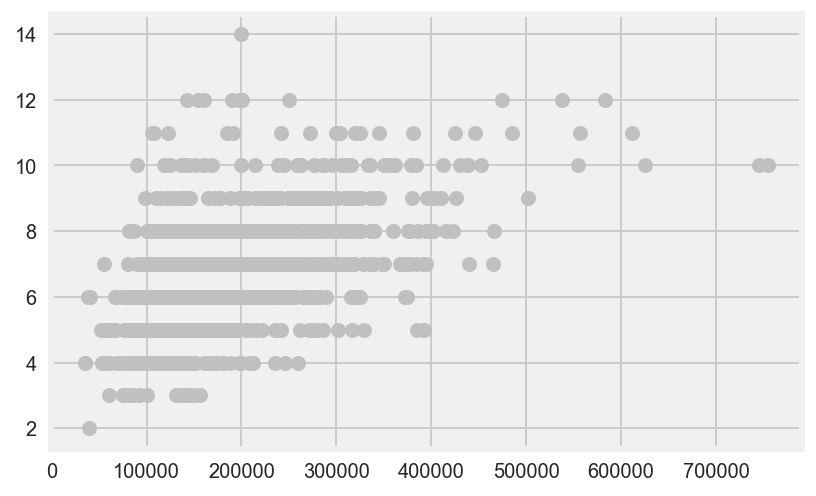

In [99]:
plt.scatter(h_train1['SalePrice'], h_train1['TotRmsAbvGrd'], c = 'silver')

In [100]:
# Sales Price and Fireplaces
h_train1['SalePrice'].corr(h_train1['Fireplaces'])

0.46692883675152763

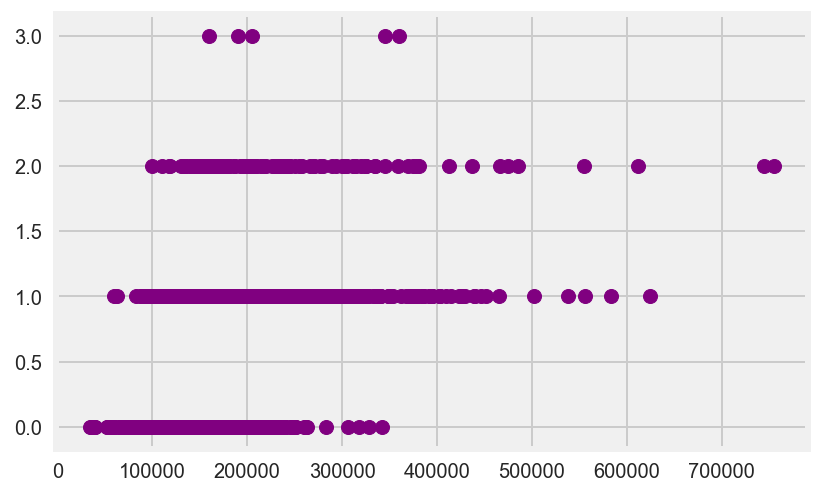

In [101]:
plt.scatter(h_train1['SalePrice'], h_train1['Fireplaces'], c = 'purple')

In [102]:
# Chosen Features
h_train1[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 
              'Kitch_Ex', 'External_Gd', 'External_Ex', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotRmsAbvGrd',
              'Fireplaces']].isnull().sum()

OverallQual     0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
GarageCars      0
GarageArea      0
Kitch_Ex        0
External_Gd     0
External_Ex     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotRmsAbvGrd    0
Fireplaces      0
dtype: int64

In [103]:
# X Features
X = h_train1[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 
              'Kitch_Ex', 'External_Gd', 'External_Ex', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotRmsAbvGrd',
              'Fireplaces', 'HQC_Ex', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge']].values

In [104]:
# Target Variable
y = h_train1[['SalePrice']]

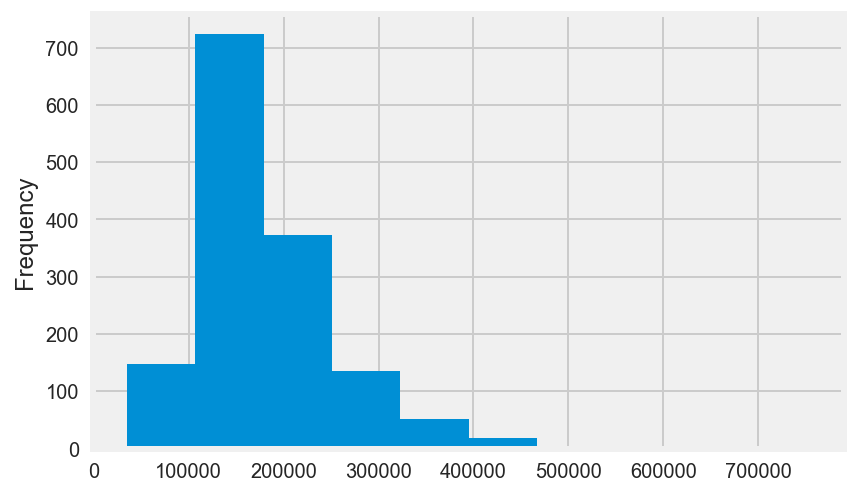

In [105]:
# This shows how skewed my target variable is and helps makes a decision on normalization.
h_train1['SalePrice'].plot(kind = 'hist')

In [106]:
# Normalizing my target variable
 #y1 = h_train1['SalePrice'].values # returns a numpy array
# rb = RobustScaler()
# y_scaled = rb.fit_transform(y1).reshape(-1, 1)


EDA ENDS !!!

In [107]:
# Train_test_split on my training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [108]:
# Dimension of my split
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(978, 18) (978, 1) (482, 18) (482, 1)


REGRESSION

In [109]:
# Instantiatin a GradientBoostRegressor object.
gbr = GradientBoostingRegressor()
# Running a cross val score
cross_val_score(gbr, X_train, y_train, cv=5).mean()
# Parameters for GridSerach
gbr_params = {
              'max_features': ['auto', 'log2'],
              'n_estimators': [100, 130, 135, 140, 150],
              'max_depth': [4, 5, 7],
              'criterion': ['friedman_mse', 'mse']
             }
# Instantiating a GridSearch object
grid = GridSearchCV(gbr, param_grid = gbr_params, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)
grid.best_params_

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 135}

In [110]:
# Running a cross val score
cross_val_score(gbr, X_train, y_train, cv=5).mean()

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

0.79243257175576887

In [111]:
# Parameters for GridSerach
gbr_params = {
              'max_features': ['auto', 'log2'],
              'n_estimators': [100, 130, 135, 140, 150],
              'max_depth': [4, 5, 7],
              'criterion': ['friedman_mse', 'mse']
             }

In [112]:
# Instantiating a GridSearch object
grid = GridSearchCV(gbr, param_grid = gbr_params, cv = 5, n_jobs = -1)

In [113]:
# Training my model on the train set
grid.fit(X_train, y_train)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 'log2'], 'n_estimators': [100, 130, 135, 140, 150], 'max_depth': [4, 5, 7], 'criterion': ['friedman_mse', 'mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [114]:
# Obtaining the best parameters
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 150}

In [115]:
# best estimators
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [116]:
# GridSerach best score
grid.best_score_

0.82207861227840395

In [117]:
# Instantiating a new grid search object
#grid_whole = GridSearchCV(gbr, param_grid = gbr_params, cv = 5, n_jobs = -1)

In [118]:
# Training my entire training set.
grid.fit(X, y)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 'log2'], 'n_estimators': [100, 130, 135, 140, 150], 'max_depth': [4, 5, 7], 'criterion': ['friedman_mse', 'mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [119]:
# Best parameter for grid_whole
grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 130}

In [120]:
# Best Estimator
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=130, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [121]:
# Best Score for grid_whole
grid.best_score_

0.86398815384407823

PREDICTIONS ON THE TEST SET

In [122]:
h_test1['HQC_Ex'] = h_train1['HQC_Ex'] 
h_test1['Neighborhood_NridgHt'] = h_train1['Neighborhood_NridgHt'] 
h_test1['Neighborhood_NoRidge'] = h_train1['Neighborhood_NoRidge'] 

In [123]:
# Test set features
Xtest_whole = h_test1[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 
              'Kitch_Ex', 'External_Gd', 'External_Ex', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotRmsAbvGrd',
              'Fireplaces', 'HQC_Ex', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge']].values

In [124]:
# Predictions
y_pred = grid.predict(Xtest_whole)

SUBMISSIONS

In [125]:
# Creating 'Id' column
submission_n = h_test[['Id']]

In [126]:
# Creating column for my predictions
submission_n['SalePrice'] = y_pred

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [127]:
# Saving my submissions in csv 
submission_n.to_csv('Aysubmission1000.csv', index=False)

In [129]:
submission_n.head(5)

,Id,SalePrice
0,2658,134889.713978
1,2718,149355.193275
2,2414,178652.882402
3,1989,114428.658740
4,625,159103.639818


In [130]:
%%html
<div class='tableauPlaceholder' id='viz1513794434860' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project3_125&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project3_125&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project3_125&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1513794434860');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='891px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>